# Student Performance Indicator

#### Life cycle of Machine Learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-processing
* Model Training
* Choose best model

### 1) Problem Statement
* This project understand how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course
### 2) Data Collection
* Dataset Source :  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The dataset consists of 8 columns and 1000 rows

In [1]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import CSV data
df = pd.read_csv(r'C:\Users\TanPhat\Documents\DATA SCIENCE\ml_project\notebook\data\stud.csv')

In [3]:
# Show head record
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Dataset Information
* gender : sex of students
* race/ethnicity : ethnicity of students --> (Group A,B,C,D,E)
* parental level of education : parent's final education -->(bachelor's degree,college,master's degree,associate's degree, high school)
* lunch : having lunch before test (standard of free/reduced)
* test preparation course: complete of not complete before test
* math score
* reading score
* writing score



In [4]:
# Shape of the dataset
df.shape

(1000, 8)

## Data Check to performs
* Check missing value
* Check duplicate
* Check data type
* Check unique values of each column
* Check statistic of dataset
* Check various categories present in the different categorical column
* Check outlier

In [5]:
# Check missing value
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- there are no missing values in the dataset

In [6]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

* there are no duplicates values in the dataset

In [7]:
# Check data types and Null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#  Check the number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# Check unique of values
df.value_counts()

gender  race_ethnicity  parental_level_of_education  lunch         test_preparation_course  math_score  reading_score  writing_score
female  group A         associate's degree           free/reduced  none                     37          57             56               1
                                                                                            41          51             48               1
                                                                                            65          85             76               1
                                                     standard      completed                55          65             62               1
                                                                                            65          70             74               1
                                                                                                                                       ..
male    group E         some high schoo

In [10]:
# Check statistic of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## INSIGHT 
    * From above description of numerical data,all means are close to each other - between 66 and 68;
    * All standard deviation are also close - between 14.6 and 15.2;
    * While minimum score for math, for while minimum score for writing is much higher (=10) and for reading is also higher than two other (=17)

## Explorating Data

In [11]:
print("Category in 'gender' variable:",end=" ")
print(df['gender'].unique())
print("Category in 'race_ethnicity' variable:",end=" ")
print(df['race_ethnicity'].unique())
print("Category in 'parental_level_of_education' variable:",end=" ")
print(df['parental_level_of_education'].unique())
print("Category in 'lunch' variable:",end=" ")
print(df['lunch'].unique())
print("Category in 'test_preparation_course' variable:",end=" ")
print(df['test_preparation_course'].unique())

Category in 'gender' variable: ['female' 'male']
Category in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Category in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Category in 'lunch' variable: ['standard' 'free/reduced']
Category in 'test_preparation_course' variable: ['none' 'completed']


In [12]:
#  Number of Male and Female
print(df['gender'].value_counts())

gender
female    518
male      482
Name: count, dtype: int64


In [13]:
# Define numerical & categorical columns
numerical_features = [ feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

# Print columns
print('We have {} numerical columnss:{}'.format(len(numerical_features),numerical_features))
print('We have {} categorical columns:{}'.format(len(categorical_features),categorical_features))

We have 3 numerical columnss:['math_score', 'reading_score', 'writing_score']
We have 5 categorical columns:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
#  Adding new columns for 'Total Score' and 'Average Score'
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df['average_score'] = df['average_score'].round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [15]:
excellent_math = (df['math_score']== 100).sum()
excellent_reading = (df['reading_score']== 100).sum()
excellent_writing = (df['writing_score']== 100).sum()

print(f'Number of excellent student in Math:{excellent_math}')
print(f'Number of excellent student in Reading:{excellent_reading}')
print(f'Number of excellent student in Writing:{excellent_writing}')

Number of excellent student in Math:7
Number of excellent student in Reading:17
Number of excellent student in Writing:14


In [16]:
reading_less_20 = (df['reading_score']<=20).sum()
writing_less_20 = (df['writing_score']<=20).sum()
math_less_20 = (df['math_score']<=20).sum()

print(f'Number of weak students in Reading {reading_less_20}')
print(f'Number of weak students in Writing {writing_less_20}')
print(f'Number of weak students in Math {math_less_20}')

Number of weak students in Reading 1
Number of weak students in Writing 3
Number of weak students in Math 4


## Insight
    * From above values we get students have performed worst in  Math 
    * Best performance is in reading section

## Visualization

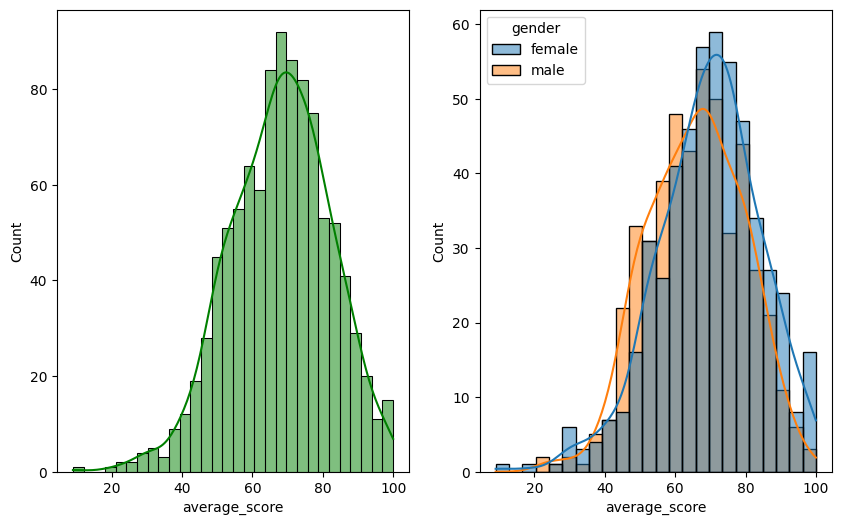

In [17]:
# Average socre distribution to make some conclustion by Histogram / KDE
fig, ax = plt.subplots(1,2, figsize= (10,6))

sns.histplot(data=df,x='average_score',kde=True,bins=30,color='g',ax=ax[0])

sns.histplot(data=df,x='average_score',kde=True,hue='gender',ax=ax[1])
plt.show()



* Female students tend to perform well than male students

<Axes: xlabel='average_score', ylabel='Count'>

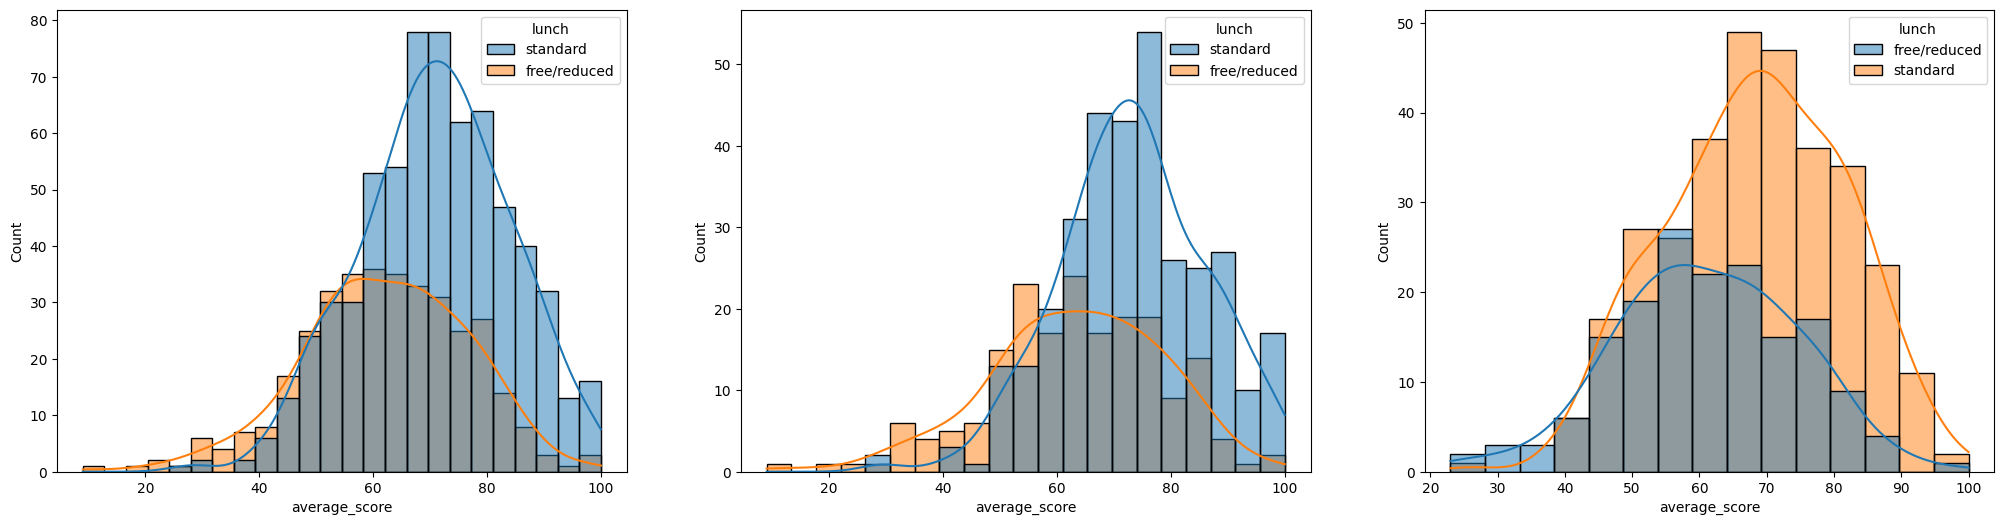

In [18]:
fig, ax = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average_score',hue='lunch',kde=True,color='b')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average_score',hue='lunch',kde=True,color='y')

* Standard lunch helped students perform well in exams
* Female and Male performed well when they had standard lunch

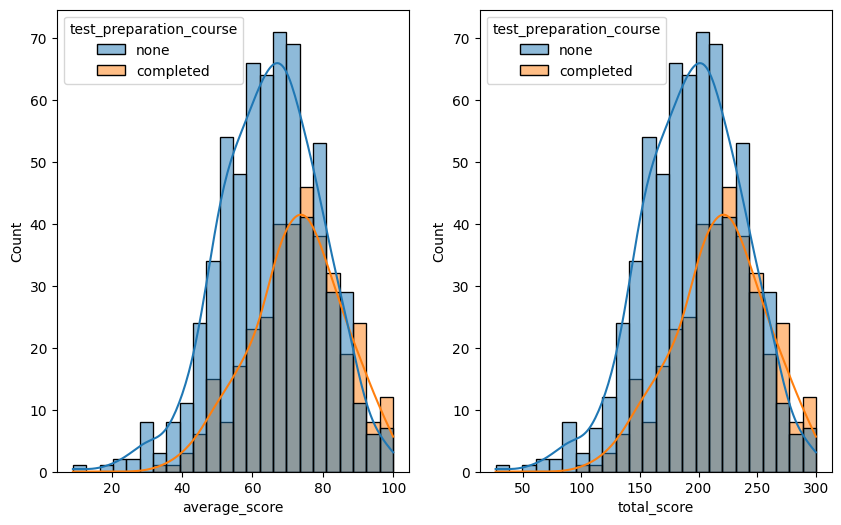

In [19]:
fig ,ax = plt.subplots(1,2,figsize=(10,6))
plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,hue='test_preparation_course')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='test_preparation_course')
plt.show()

*  They didn't enroll the test preparation course, they still perfomed well in exams

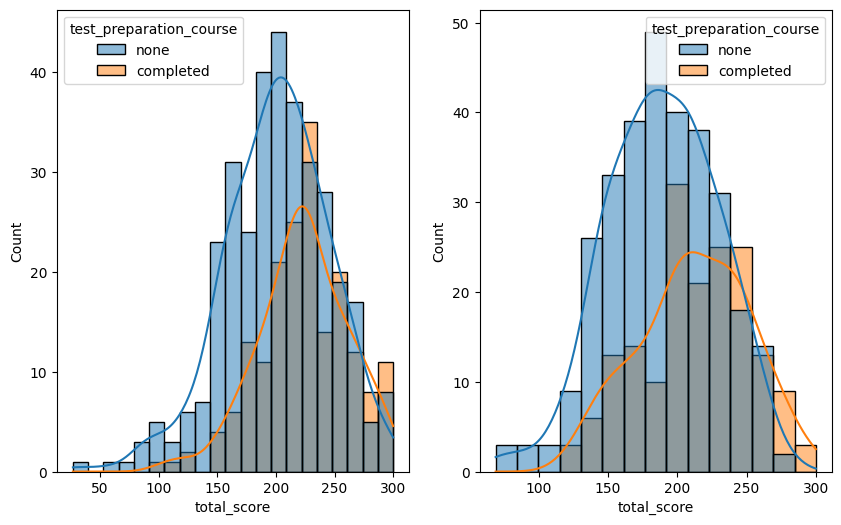

In [20]:
fig ,ax = plt.subplots(1,2,figsize=(10,6))
plt.subplot(121)
sns.histplot(data=df[df['gender']=='female'],x='total_score',kde=True,hue='test_preparation_course')
plt.subplot(122)
sns.histplot(data=df[df['gender']=='male'],x='total_score',kde=True,hue='test_preparation_course')
plt.show()

Text(0.5, 1.0, 'Distribution Average Score By Parental Level Of Education')

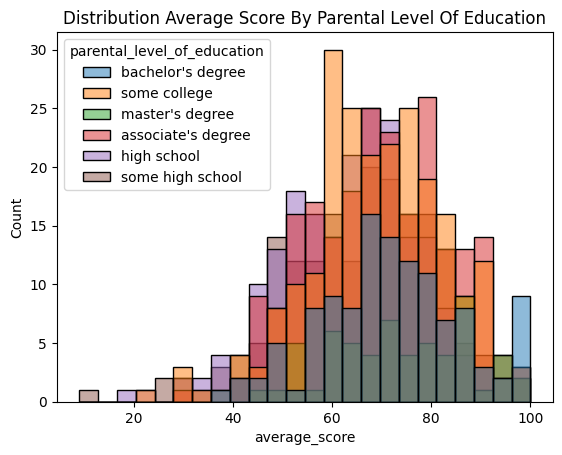

In [21]:
sns.histplot(data=df,x='average_score',hue='parental_level_of_education')
plt.title('Distribution Average Score By Parental Level Of Education')

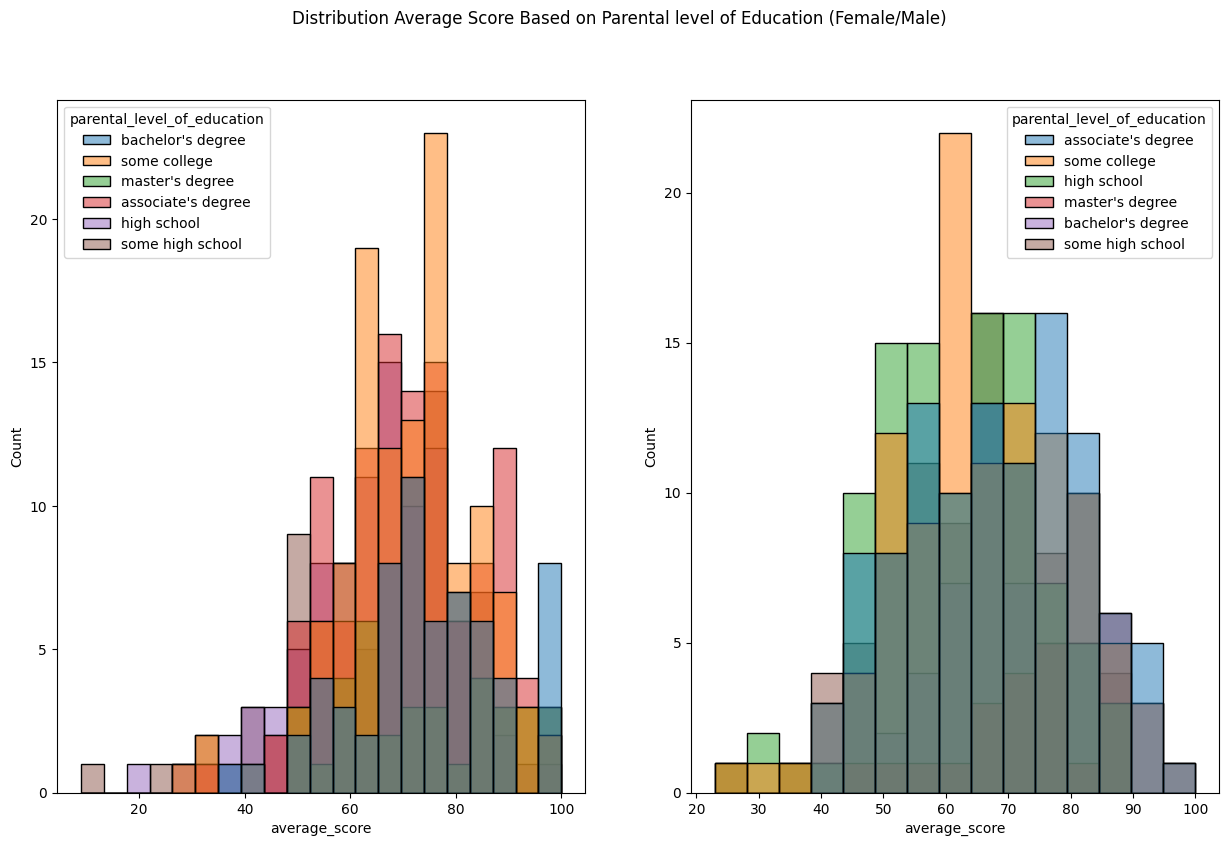

In [22]:
fig , ax = plt.subplots(1,2, figsize=(15,9))
sns.histplot(data=df[df['gender']=='female'],x='average_score',hue='parental_level_of_education',ax=ax[0])
sns.histplot(data=df[df['gender']=='male'],x='average_score',hue='parental_level_of_education',ax=ax[1])
fig.suptitle('Distribution Average Score Based on Parental level of Education (Female/Male)')
plt.show()

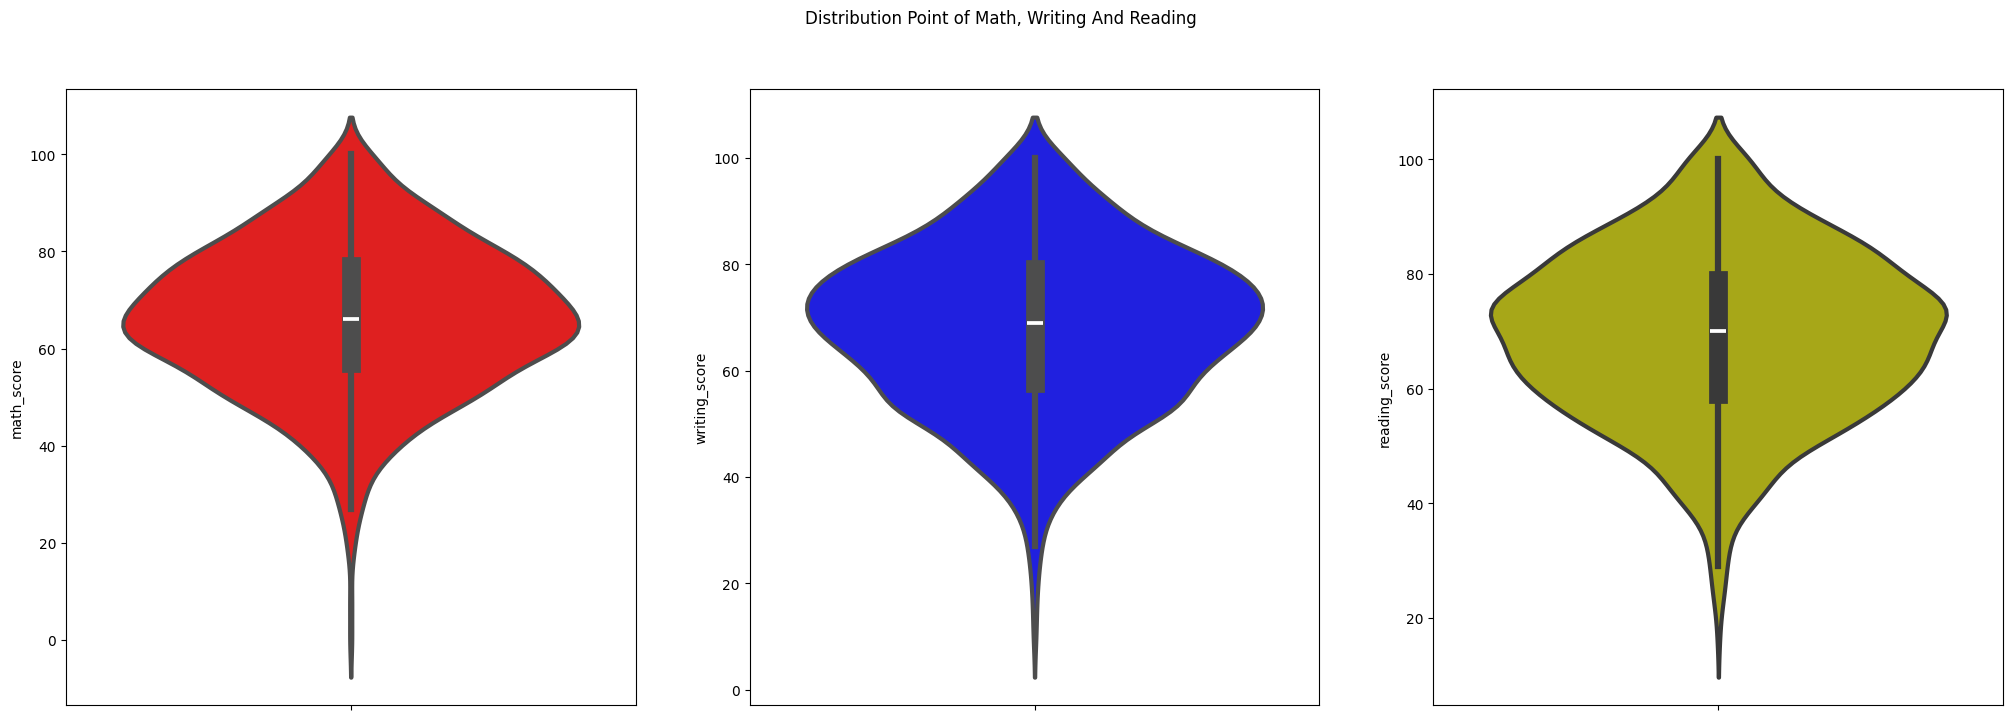

In [23]:
fig,ax = plt.subplots(1,3, figsize=(25,8))

sns.violinplot(data=df,y='math_score',color='red',linewidth=3,ax=ax[0])
sns.violinplot(data=df,y='writing_score',color='b',linewidth=3,ax=ax[1])
sns.violinplot(data=df,y='reading_score',color='y',linewidth=3,ax=ax[2])
plt.suptitle('Distribution Point of Math, Writing And Reading ')
plt.show()




* Most of students score between 60-80 in Maths whereas in Writing and Readin most of them score from 50-80

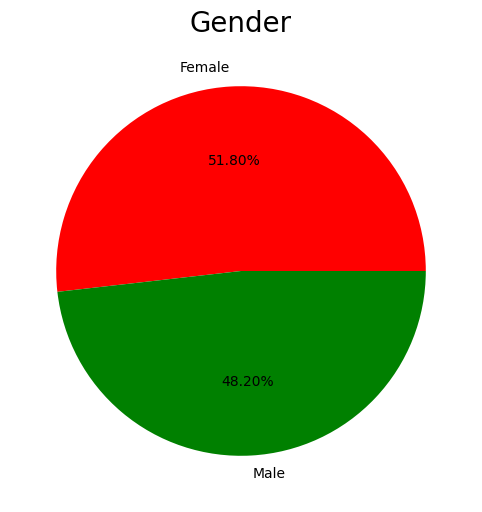

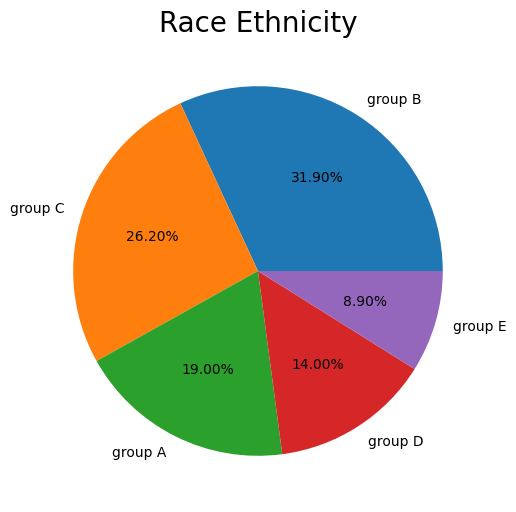

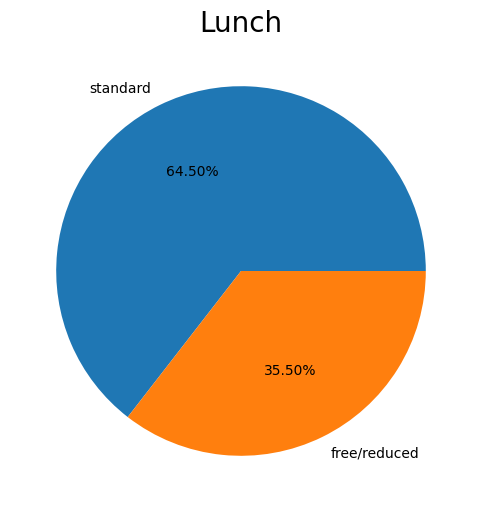

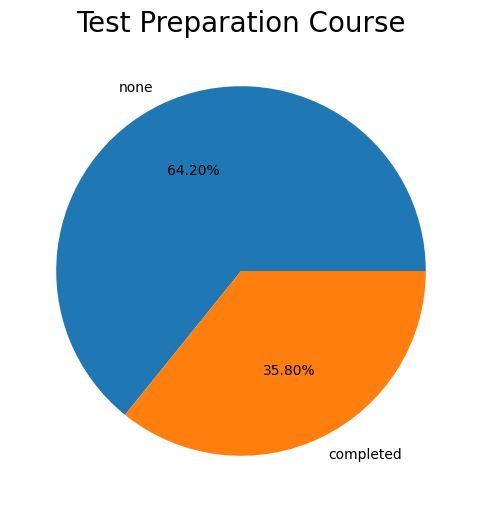

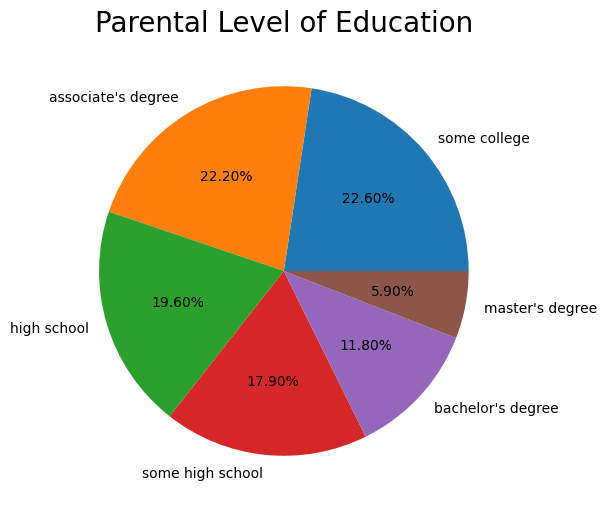

In [24]:
size  = df['gender'].value_counts()
labels = 'Female','Male'
color =['red','green']
plt.figure(figsize=(10,6))
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

size  = df['race_ethnicity'].value_counts()
labels = df['race_ethnicity'].unique()
plt.figure(figsize=(10,6))
plt.pie(size,labels=labels,autopct='%.2f%%')
plt.title('Race Ethnicity',fontsize=20)
plt.axis('off')

plt.figure(figsize=(10,6))
plt.pie(df['lunch'].value_counts(),labels=df['lunch'].value_counts().index,autopct='%.2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.figure(figsize=(10,6))
plt.pie(df['test_preparation_course'].value_counts(),labels=df['test_preparation_course'].value_counts().index,autopct='%.2f%%')
plt.title('Test Preparation Course',fontsize=20)
plt.axis('off')

plt.figure(figsize=(10,6))
plt.pie(df['parental_level_of_education'].value_counts(),labels=df['parental_level_of_education'].value_counts().index,autopct='%.2f%%')
plt.title('Parental Level of Education',fontsize=20)
plt.axis('off')

plt.show()




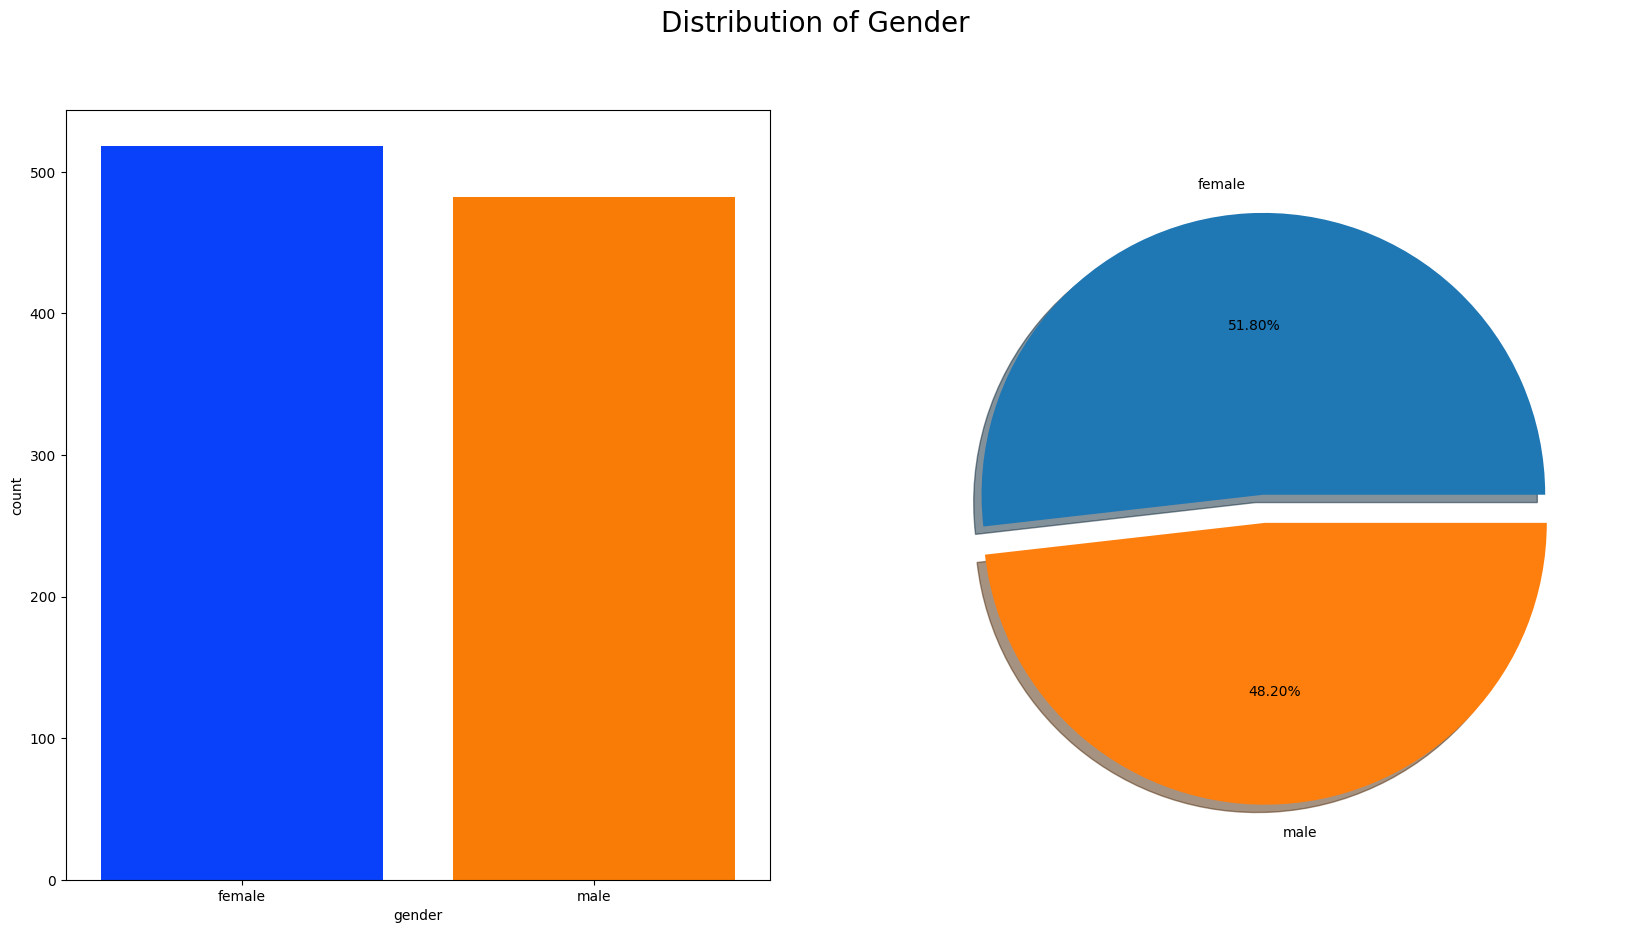

In [25]:
# How is distribution of Gender ?
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x=df['gender'],palette='bright',saturation=0.95,ax=ax[0])
ax[1].pie(df['gender'].value_counts(),labels=df['gender'].unique(),explode=[0,0.1],autopct='%.2f%%',shadow=True)
plt.suptitle('Distribution of Gender',fontsize=20)
plt.show()

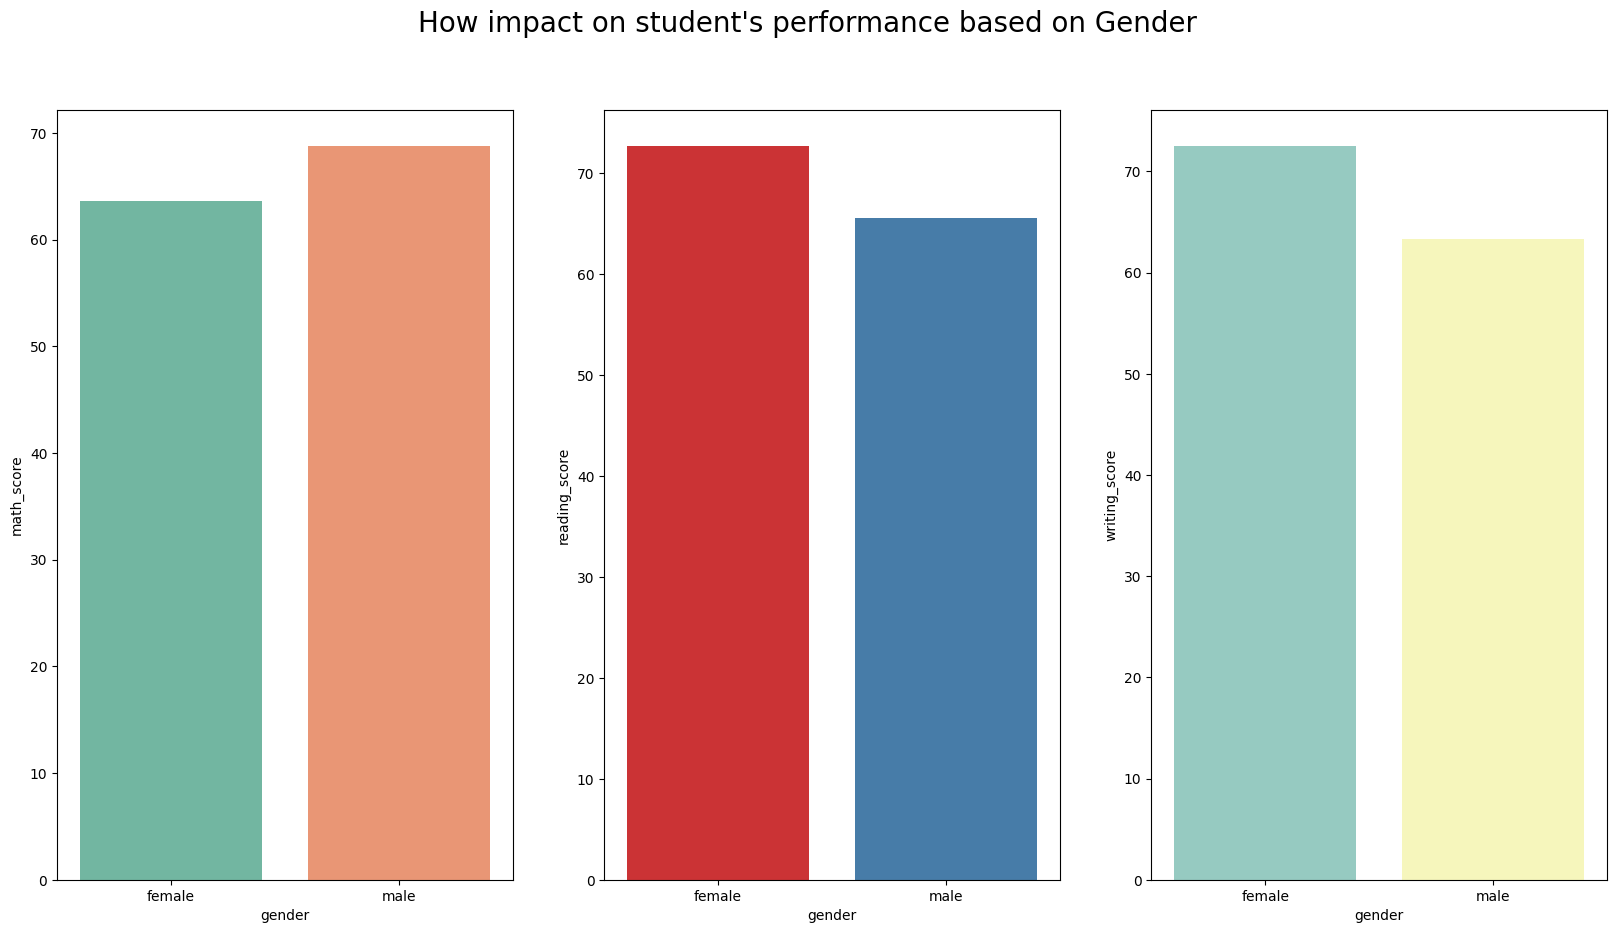

In [26]:
# Is gender has any impact on student's performance ? 
gender_gr_math = df.groupby('gender')['math_score'].mean()
gender_gr_read = df.groupby('gender')['reading_score'].mean()
gender_gr_write = df.groupby('gender')['writing_score'].mean()
fig,ax = plt.subplots(1,3,figsize=(20,10))

sns.barplot(gender_gr_math,palette='Set2',ax=ax[0])
sns.barplot(gender_gr_read,palette='Set1',ax=ax[1])
sns.barplot(gender_gr_write,palette='Set3',ax=ax[2])

plt.suptitle("How impact on student's performance based on Gender",fontsize=20)
plt.show()


* On average females have a beter overall score than men
* Whereas males have scored higher in maths

Text(0.5, 0.98, 'Mean of Subject Scores Categorized by Race-Ethnicity')

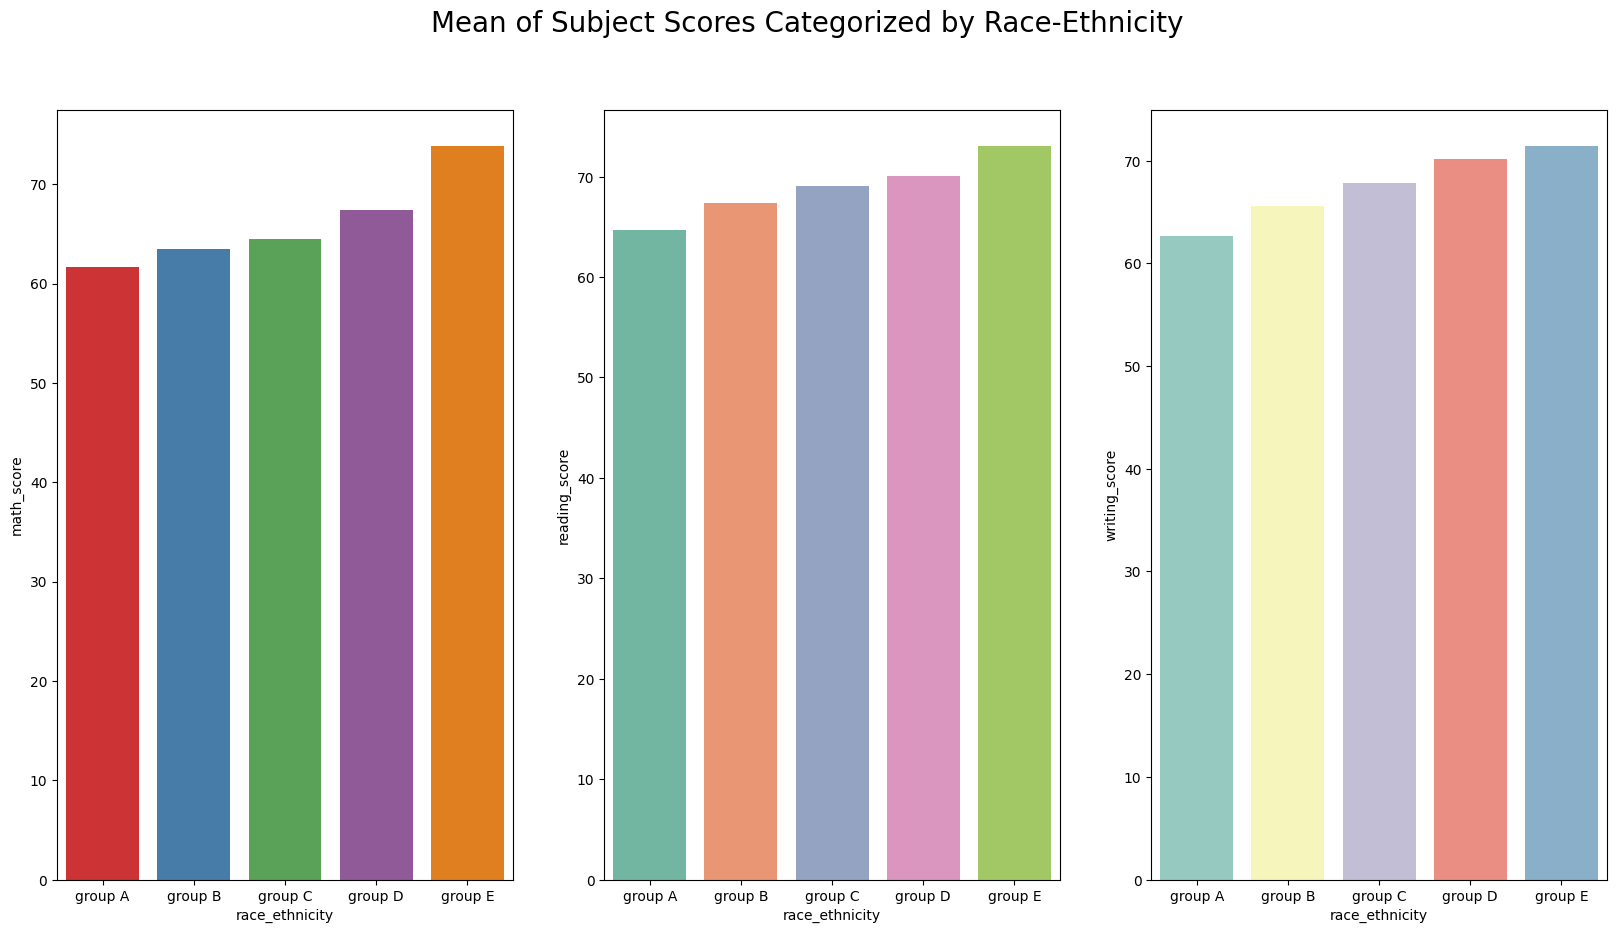

In [27]:
# How is Group has impact on students'performance ?
race_gr_math =df.groupby('race_ethnicity')['math_score'].mean()
race_gr_reading =df.groupby('race_ethnicity')['reading_score'].mean()
race_gr_writing =df.groupby('race_ethnicity')['writing_score'].mean()

fig, ax = plt.subplots(1,3,figsize=(20,10))

sns.barplot(data=race_gr_math,palette='Set1',ax=ax[0])
sns.barplot(data=race_gr_reading,palette='Set2',ax=ax[1])
sns.barplot(data=race_gr_writing,palette='Set3',ax=ax[2])

plt.suptitle('Mean of Subject Scores Categorized by Race-Ethnicity',fontsize=20)




* Group E students have scored the highest marks and Group A have scored the lowest marks

Text(0.5, 0.98, 'Mean of Subject Scores Categorized Educational Background of Parents')

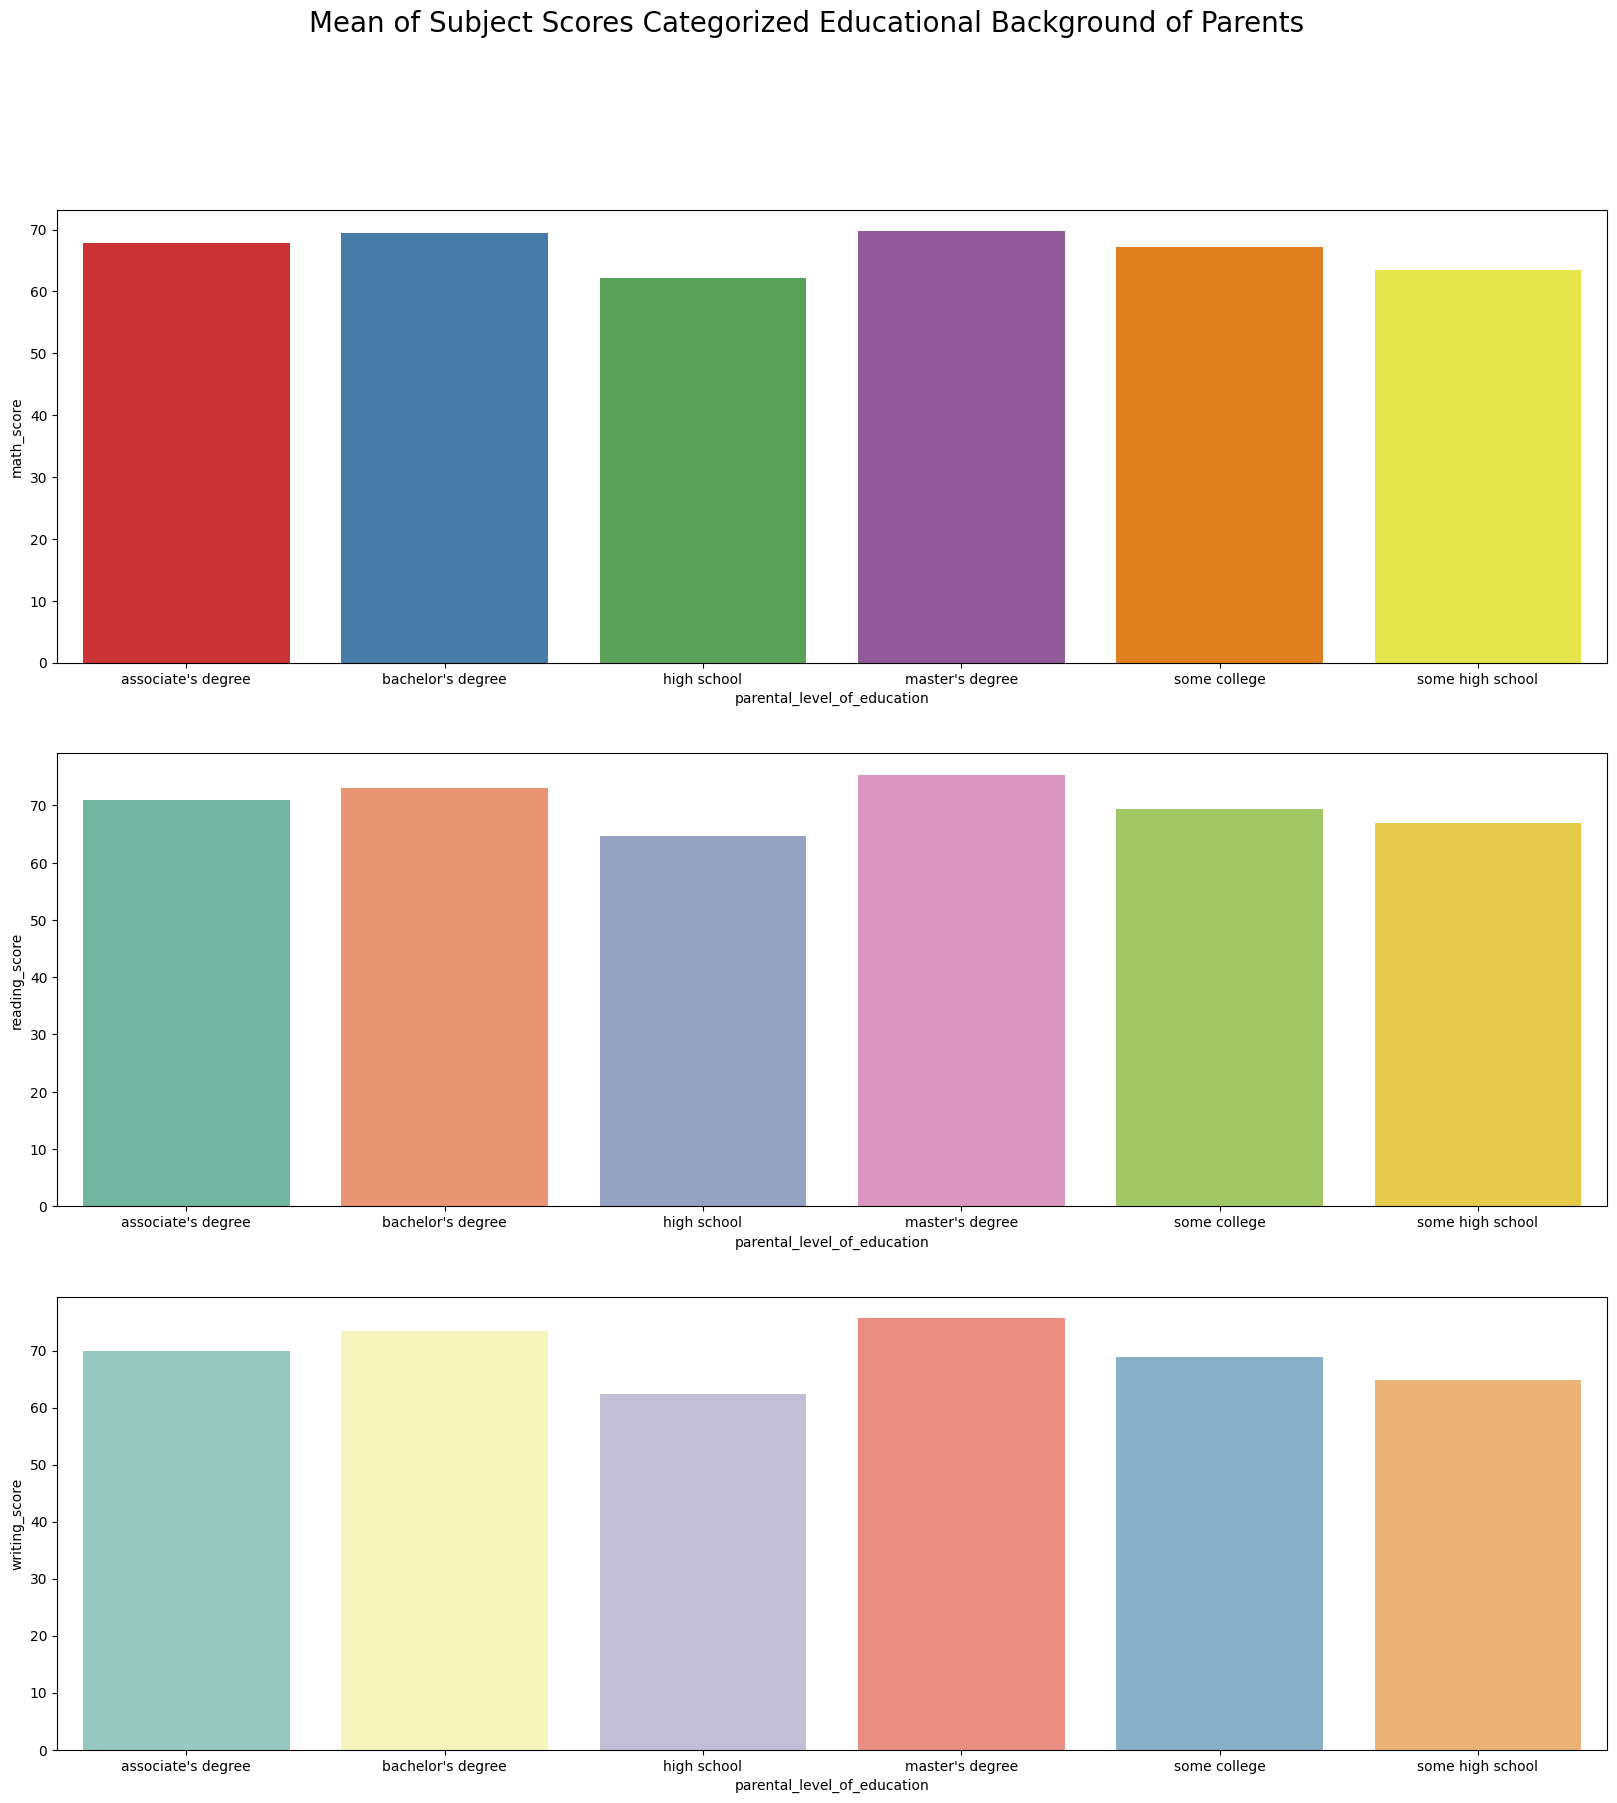

In [28]:
# How is Group has impact on students'performance ?
parent_edu_math =df.groupby('parental_level_of_education')['math_score'].mean()
parent_edu_reading =df.groupby('parental_level_of_education')['reading_score'].mean()
parent_edu_writing =df.groupby('parental_level_of_education')['writing_score'].mean()

fig, ax = plt.subplots(3,1,figsize=(20,20))

sns.barplot(parent_edu_math,palette='Set1',ax=ax[0])
sns.barplot(parent_edu_reading,palette='Set2',ax=ax[1])
sns.barplot(parent_edu_writing,palette='Set3',ax=ax[2])

plt.suptitle('Mean of Subject Scores Categorized Educational Background of Parents',fontsize=20)




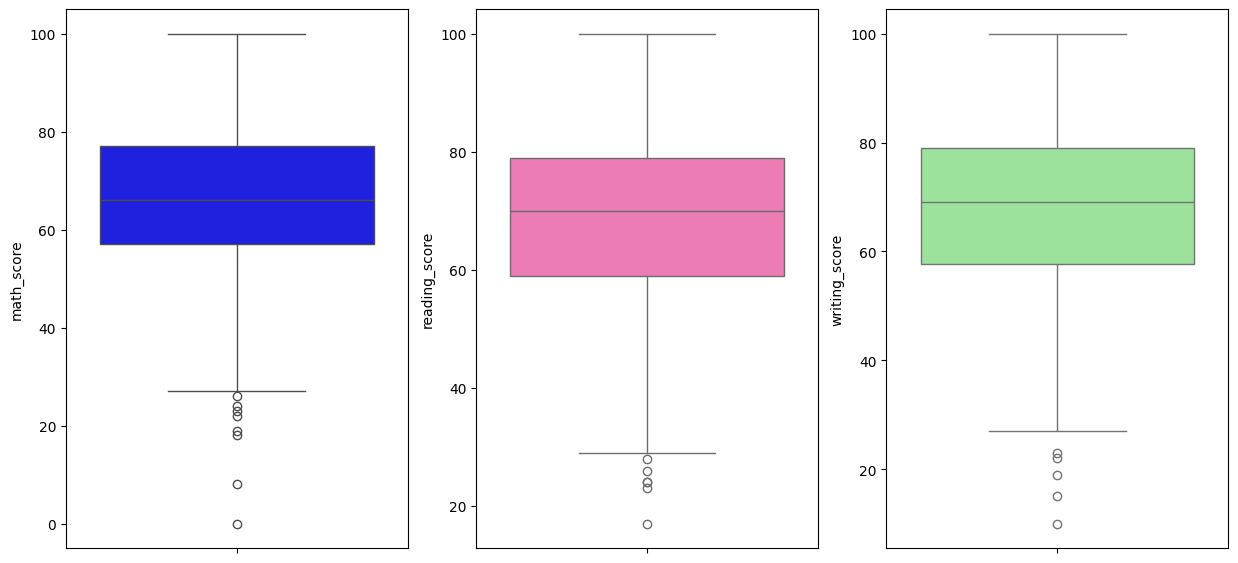

In [29]:
# Checking outliers
fig,ax= plt.subplots(1,3,figsize=(15,7))
sns.boxplot(df['math_score'],color='blue',ax=ax[0])
sns.boxplot(df['reading_score'],color='hotpink',ax=ax[1])
sns.boxplot(df['writing_score'],color='lightgreen',ax=ax[2])
plt.show()

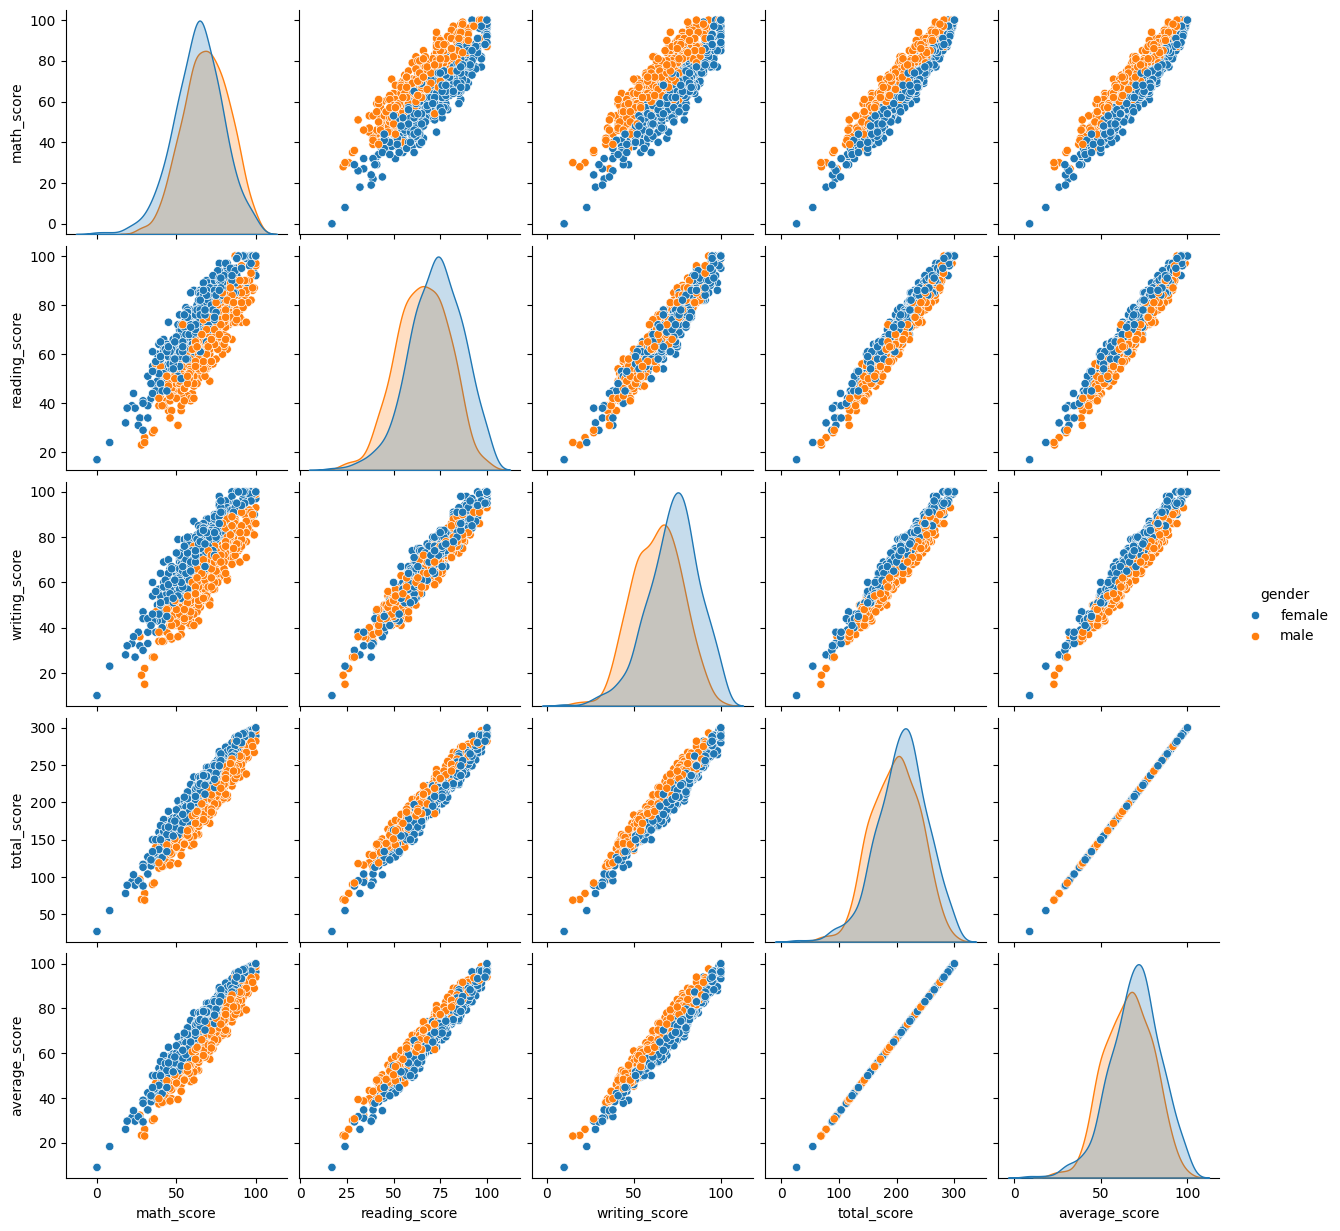

In [30]:
# Multivariate analysis using pairplot
sns.pairplot(df,hue= 'gender')
plt.show()


* From the above plot it is clear that all the scores increase linearly with each other.

## Conclusion
* Student's Performance is related with lunch, race, parental level education
* Female lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial